## Лабораторная работа 1

#### Задание 1

Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: более 10 000 строк, более 20 столбцов, разные типы в столбцах, обязательно наличие целевого признака (таргета).

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [4]:
frame = pd.read_csv('data.csv', sep=';', encoding='cp1252')
predictors = ['cap-diameter', 'stem-height']
outcome = 'class'
frame

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


Подготовка данных для тестирования

In [5]:
frame.isnull().sum()
frame = frame.astype({
                      'class' : 'category',
                      'cap-shape' : 'category',
                      'cap-diameter' : 'float16',
                      'cap-surface' : 'category',
                      'cap-color' : 'category',
                      'does-bruise-or-bleed' : 'category',
                      'gill-attachment' : 'category',
                      'gill-spacing' : 'category',
                      'gill-color' : 'category',
                      'stem-height' : 'float16',
                      'stem-width' : 'float16',
                      'stem-root' : 'category',
                      'stem-surface' : 'category',
                      'stem-color' : 'category',
                      'veil-type' : 'category',
                      'veil-color' : 'category',
                      'has-ring' : 'category',
                      'ring-type' : 'category',
                      'spore-print-color' : 'category',
                      'habitat' : 'category',
                      'season' : 'category'
                      })
frame.dtypes

class                   category
cap-diameter             float16
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float16
stem-width               float16
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object

In [6]:
encoder = LabelEncoder()
for column in frame.columns:
    if frame[column].dtype == 'category':
        frame[column] = encoder.fit_transform(frame[column])

frame.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.257812,6,2,6,0,2,3,10,16.953125,...,4,7,11,0,4,1,2,7,0,3
1,1,16.593750,6,2,6,0,2,3,10,17.984375,...,4,7,11,0,4,1,2,7,0,2
2,1,14.070312,6,2,6,0,2,3,10,17.796875,...,4,7,11,0,4,1,2,7,0,3
3,1,14.171875,2,3,1,0,2,3,10,15.773438,...,4,7,11,0,4,1,5,7,0,3
4,1,14.640625,6,3,6,0,2,3,10,16.531250,...,4,7,11,0,4,1,5,7,0,3


 Разделим датасет на обучающую выборку и тестовую выборку. Обучающая выборка будет использоваться для обучения модели, а тестовая выборка - для оценки ее точности

 20% данных будет использоваться для тестирования моделей

In [7]:
y = frame['class'].values
x = frame.drop(['class'], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Задание 2

Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [9]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
train_preds = model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(f'Ошибка прогноза на обучающих данных : {rmse}')

Ошибка прогноза на обучающих данных : 0.013572715501299435


In [11]:
test_preds = model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(f'Ошибка прогноза на тестовых данных : {rmse}')

Ошибка прогноза на тестовых данных : 0.020232802597912738


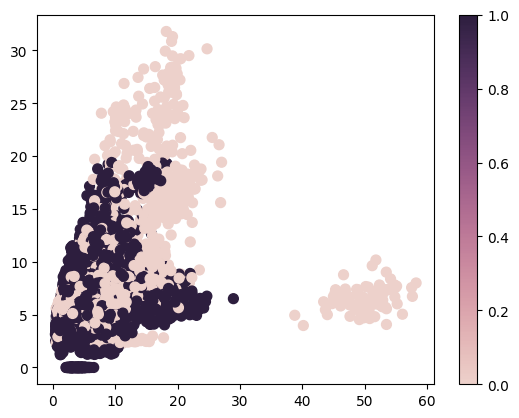

In [12]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test[:, 0], x_test[:, 8], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

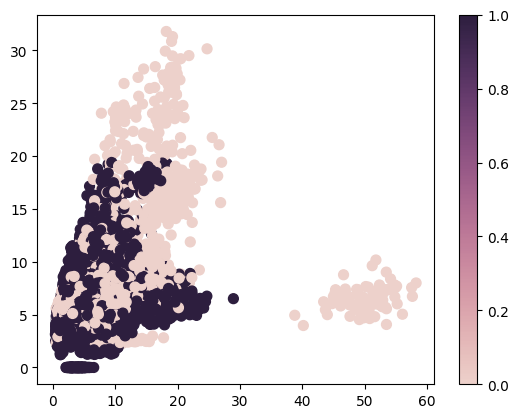

In [13]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test[:, 0], x_test[:, 8], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

**Улучшение производительности kNN**

Чтобы найти лучшее значение для k, будем использовать инструмент под названием GridSearchCV. Это инструмент, который часто используется для настройки гиперпараметров моделей машинного обучения. В вашем случае это поможет автоматически найти наилучшее значение k для набора данных.

In [14]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 2}

In [15]:
train_preds_grid = gridsearch.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print(f'Ошибка прогноза на обучающих данных : {train_rmse}')
print(f'Ошибка прогноза на тестовых данных : {test_rmse}')

Ошибка прогноза на обучающих данных : 0.007836210948309436
Ошибка прогноза на тестовых данных : 0.015005048001634566


**Метод k-ближайших соседей – это простой алгоритм машинного обучения с учителем, который можно использовать для решения задач классификации и регрессии. Он прост в реализации и понимании, но имеет существенный недостаток – значительное замедление работы, когда объем данных растет.**

## Лабораторная работа 2

#### Задание 1

Провести классификацию найденного датасета, методом машины опорных векторов. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [16]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

Метод опорных векторов (МОВ) — это техника машинного обучения с учителем. Она используется в классификации, может быть применена к регрессионным задачам.

Метод определяет границу принятия решения (ГПР) вместе с максимальным зазором, который разделяет почти все точки на два класса, оставляя место для неправильной классификации.

Цель МОВ — определить гиперплоскость (также называется “разделяющей” или “ГПР”), которая разделяет точки на два класса.

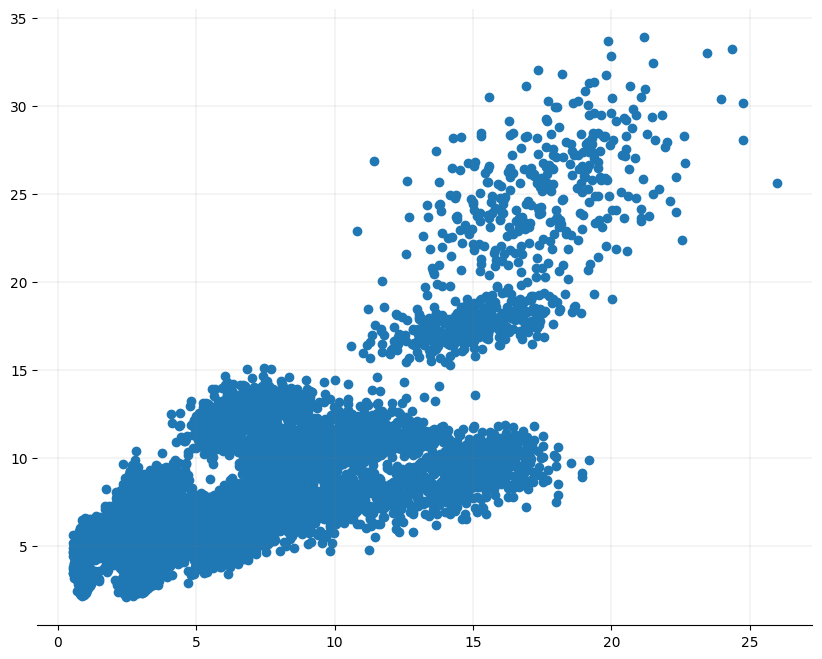

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(frame[:len(x_test)]['cap-diameter'], frame[:len(x_test)]['stem-height'])
plt.show()

In [18]:
model = svm.SVC(kernel='poly')
model.fit(x_train, y_train)

SVC(kernel='poly')

In [19]:
y_pred = model.predict(x_test)
print(f'Точность модели : {accuracy_score(y_test, y_pred)}')
print(f'Отзыв модели : {metrics.recall_score(y_test, y_pred)}')

Точность модели : 0.9461313868613138
Отзыв модели : 0.947514619883041


**Гиперпараметры**

**C (регуляризация)** : Определяет силу регуляризации в модели SVM (Support Vector Machine / Машина опорных векторов); более низкое значение C увеличивает штраф за неправильную классификацию, что может привести к созданию простой модели с большей обобщающей способностью.

**gamma (ядерный коэффициент)** : Определяет влияние одного тренировочного примера на другие; меньшие значения gamma означают более широкие гауссовы функции и приводят к более простым/прямым границам решения.

**kernel (ядро)** : Определяет тип использованного ядра (линейное или RBF); линейное ядро работает линейно, тогда как RBF (радиально-базисная функция) способно моделировать сложные границы решений.

In [ ]:
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': [0.1, 1, 10]}

In [ ]:
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

In [ ]:
print(f'Лучшие гиперпараметры : {best_params}')

best_svc = grid.best_estimator_
y_pred = best_svc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели : {accuracy}')

report = classification_report(y_test, y_pred, zero_division=1)
print(f'Отчет о классификации : \n{report}')

Классификаторы SVM обеспечивают хорошую точность и выполняют более быстрое прогнозирование. Они также используют меньше памяти, поскольку на этапе принятия решения используют подмножество тренировочных точек. SVM хорошо работает с четким запасом разделения и с пространством большой размерности.

SVM не подходит для больших наборов данных из-за большого времени обучения. Он плохо работает с перекрывающимися классами, а также чувствителен к типу используемого ядра.

## Лабораторная работа 3

#### Задание 1

Провести классификацию найденного датасета, методами линеной и логистической регрессий . В формате Markdown написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

##### Линейная регрессия

**Линейная регрессия** – одна из важнейших и широко используемых техник регрессии. Эта самый простой метод регрессии. Одним из его достоинств является лёгкость интерпретации результатов.

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [96]:
model = LinearRegression() 
model.fit(x_train, y_train) 
linear_accuracy = model.score(x_test, y_test)

In [97]:
train_pred = model.predict(x_train)
mse = mean_squared_error(y_train, train_pred)
rmse = sqrt(mse)

print(f'Ошибка прогноза на обучающих данных : {rmse}')
print("Коэффициент R2 : %.2f" % r2_score(y_test, y_pred))

Ошибка прогноза на обучающих данных : 0.46856826530509
Коэффициент : 0.12


In [98]:
test_pred = model.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
rmse = sqrt(mse)

print(f'Ошибка прогноза на тестовых данных : {rmse}')
print("Коэффициент R2 : %.2f" % r2_score(y_test, y_pred))

Ошибка прогноза на тестовых данных : 0.466585091490068
Коэффициент : 0.12


##### Логистическая регрессия

**Логистическая регрессия** - это статистический метод анализа набора данных, в котором есть одна или несколько независимых переменных, определяющих результат. Результат измеряется с помощью дихотомической переменной (в которой есть только два возможных результата)

**Гиперпараметры :**

**C:** обратная сила регуляризации. Меньшие значения C указывают на более сильную регуляризацию. 

**penalty:** задает тип регуляризации (например, L1 или L2). 

**solver:** алгоритм, используемый для оптимизации весов (например, 'liblinear', 'saga', 'lbfgs' и другие).

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

##### Перекрастная проверка гиперпараметров

In [ ]:
logistic = LogisticRegression(max_iter=1000)
grid = GridSearchCV(logistic, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

In [ ]:
best_logistic = grid.best_estimator_
logistic_accuracy = best_logistic.score(x_test, y_test)
print(f"Лучшие гиперпараметры логистической регрессии: {grid.best_params_}")
print(f"Точность модели логистической регрессии: {logistic_accuracy}")
print(f"Точность модели линейной регрессии: {linear_accuracy}")

y_pred = best_logistic.predict(x_test)

print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))